In [11]:
import tensorflow as tensor
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
from random import randint
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [12]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"indahauliasahira","key":"5a19fc732304e9b49d3d97927d536b8a"}'}

In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d indahauliasahira/image-classification-pisang

image-classification-pisang.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
import zipfile,os
zip_lcl = '/content/image-classification-pisang.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/content')
rzip.close()

In [17]:
dirbase = '/content/IMAGE CLASSIFICATION PISANG'
dir_latih = os.path.join(dirbase, 'TRAIN')
dir_val = os.path.join(dirbase, 'VALIDATION')

In [18]:
CLASSES, gems = [], []

for root, dirs, files in os.walk(dir_latih):
    f = os.path.basename(root) 
        
    if len(files) > 0:
        gems.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f)
    
gems_count = len(CLASSES)
print('{} classes with {} images in total'.format(len(CLASSES), sum(gems)))

3 classes with 240 images in total


In [19]:
os.listdir(dir_latih)

['PISANG MASAK', 'PISANG MENTAH', 'PISANG BUSUK']

In [20]:
os.listdir(dir_val)

['PISANG MASAK', 'PISANG MENTAH', 'PISANG BUSUK']

In [21]:
latih_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest')

val_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.3,
    shear_range=0.2,
    fill_mode='nearest')

In [22]:
batchSize = 4

In [23]:
generator_latih = latih_generator.flow_from_directory(
    directory=dir_latih,
    target_size=(150,150),
    batch_size=batchSize,
    subset='training',
    class_mode='categorical')
generator_valid = val_generator.flow_from_directory(
    directory=dir_val,
    target_size=(150,150),
    batch_size=batchSize,
    subset='validation',
    class_mode='categorical')

Found 240 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


In [24]:
model = tensor.keras.models.Sequential([
  tensor.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(128,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Flatten(),
  tensor.keras.layers.Dense(512,activation='relu'),
  tensor.keras.layers.Dense(3,activation='softmax')
  ])

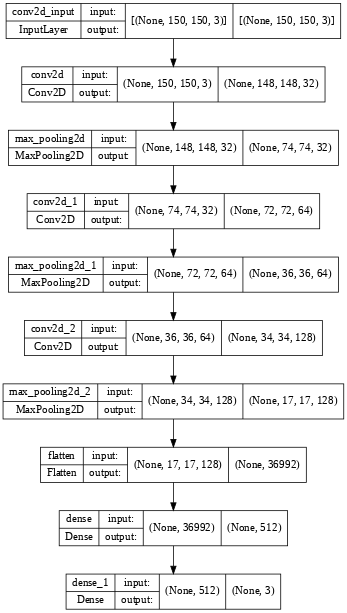

In [25]:
model_viz = tensor.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [26]:
model.compile(loss='categorical_crossentropy',optimizer=tensor.optimizers.Adam(),
              metrics=['accuracy'])

In [27]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.95):
      print("\nAkurasi di atas 90%, hentikan training!")
      self.model.stop_training = True
        
stop = myCallback()

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
#earstop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

In [29]:
history = model.fit(
    generator_latih,
    steps_per_epoch=240/4, # 10243 images = batch_size * steps
    epochs=30,
    validation_data=generator_valid,
    validation_steps=9/4, # 1050 images = batch_size * steps
    verbose=2,
    callbacks=[cekmodel,stop])

Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to model.hdf5
60/60 - 28s - loss: 1.2262 - accuracy: 0.3458 - val_loss: 1.0910 - val_accuracy: 0.3333 - 28s/epoch - 474ms/step
Epoch 2/30

Epoch 2: val_accuracy improved from 0.33333 to 0.44444, saving model to model.hdf5
60/60 - 15s - loss: 0.9924 - accuracy: 0.4667 - val_loss: 1.0519 - val_accuracy: 0.4444 - 15s/epoch - 243ms/step
Epoch 3/30

Epoch 3: val_accuracy did not improve from 0.44444
60/60 - 14s - loss: 0.9224 - accuracy: 0.5625 - val_loss: 1.2444 - val_accuracy: 0.4444 - 14s/epoch - 236ms/step
Epoch 4/30

Epoch 4: val_accuracy improved from 0.44444 to 0.77778, saving model to model.hdf5
60/60 - 16s - loss: 0.8198 - accuracy: 0.5917 - val_loss: 0.6603 - val_accuracy: 0.7778 - 16s/epoch - 267ms/step
Epoch 5/30

Epoch 5: val_accuracy did not improve from 0.77778
60/60 - 14s - loss: 0.6625 - accuracy: 0.6917 - val_loss: 0.7295 - val_accuracy: 0.6667 - 14s/epoch - 239ms/step
Epoch 6/30

Epoch 6: val_ac

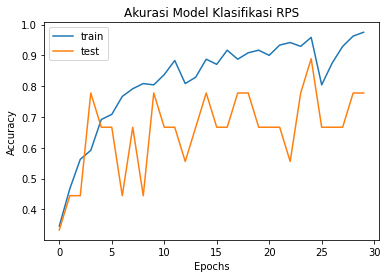

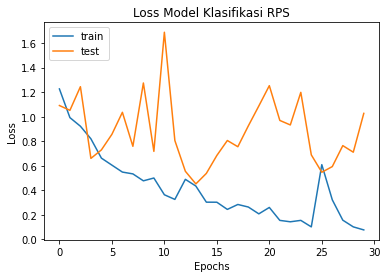

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model Klasifikasi RPS')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model Klasifikasi RPS')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[0. 0. 1.]]
2


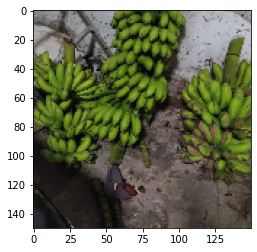

[[0. 0. 1.]]
2


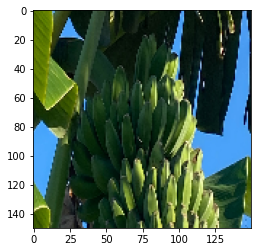

[[0. 0. 1.]]
2


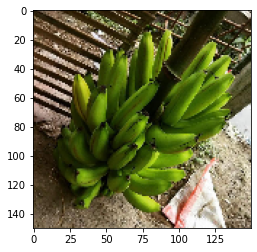

[[0. 0. 1.]]
2


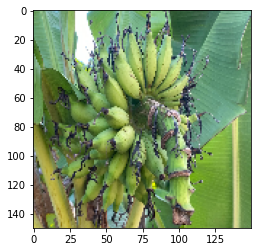

[[0. 0. 1.]]
2


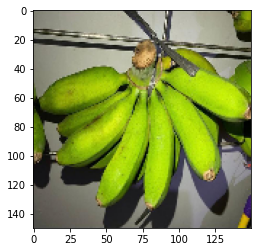

[[0. 1. 0.]]
1


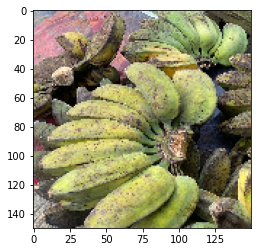

[[0. 0. 1.]]
2


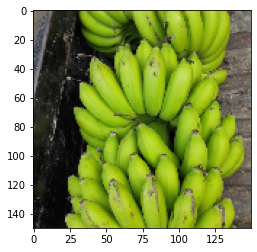

[[0. 0. 1.]]
2


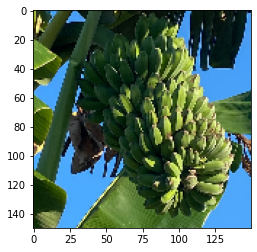

[[0. 0. 1.]]
2


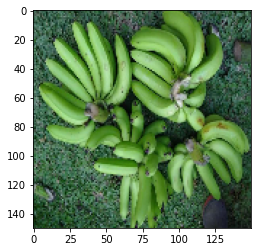

[[0. 0. 1.]]
2


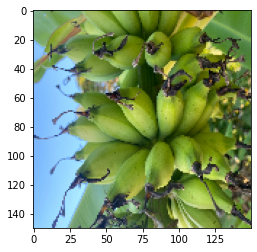

In [31]:
testes = '/content/IMAGE CLASSIFICATION PISANG/TEST/PISANG MENTAH'
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = os.listdir(testes)
path = []
for fn in uploaded:
  path.append(fn)

for obj in path:
  patoh = os.path.join(testes,obj)
  img = image.load_img(patoh, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)
  class_index = np.argmax(classes)
  class_indeks = int(class_index)
  print(classes)
  print(class_indeks)
  plt.imshow(img)
  plt.show()

In [32]:
pengubah = tensor.lite.TFLiteConverter.from_keras_model(model)
tflite_model = pengubah.convert()

INFO:tensorflow:Assets written to: /tmp/tmporloryvh/assets


In [33]:
with tensor.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [34]:
model.save('model.h5') 
%cd

/root


In [35]:
model.save('model.hdf5')